##**Prediction and Probabilistic Analysis of Flood Occurrence in Kerala**

---




## **Introduction:**
Predicting floods is a critical challenge in disaster management and mitigation. The ability to forecast floods using historical rainfall data can significantly contribute to early warning systems and proactive disaster preparedness. Timely and accurate predictions empower authorities and communities to take preventive measures, evacuate vulnerable areas, and allocate resources efficiently, ultimately minimizing the impact of floods on lives and property.


### **Dataset Description:**

Features: The dataset consists of historical rainfall data, encompassing key features such as monthly rainfall, annual rainfall, and the binary indicator of flood occurrence.

Flood Occurrence: The flood occurrence is represented as a binary variable, taking the value of 1 to indicate the presence of a flood and 0 denoting no flood.

Size: The dataset's size includes information about the number of instances and features, providing a comprehensive set of data for both model training and evaluation.

dataset: kerela.csv



**importing libraries**

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## **DATA LOADING AND EXPLORATION**

In [147]:
data=pd.read_csv('/kerala.csv.xls')
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [229]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [149]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


### **data cleaning and preprocessing**

In [150]:
data.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

**No missing values found**

###**HANDLING OUTLIERS**

**BY USING IQR METHOD**

In [151]:

for column in data.columns:
    if data[column].dtype != 'object':

        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((data[column] < lower_bound) | (data[column] > upper_bound))

               print(f"Number of outliers in {column}: {outliers.sum()}")

                replaced_values = data[column][outliers]
        data[column] = np.where(outliers, data[column].median(), data[column])

                if replaced_values.any():
            print(f"Replaced values in {column}: {replaced_values}")



Number of outliers in YEAR: 0
Number of outliers in JAN: 8
Replaced values in JAN: 8     54.1
17    42.9
18    43.0
20    43.0
33    74.5
42    83.5
47    43.0
84    61.2
Name: JAN, dtype: float64
Number of outliers in FEB: 10
Replaced values in FEB: 16     47.6
27     65.9
37     79.0
49     53.7
51     48.2
61     54.7
83     60.0
99     57.8
102    50.9
117    52.1
Name: FEB, dtype: float64
Number of outliers in MAR: 4
Replaced values in MAR: 35     116.0
45     108.4
46      98.0
107    217.2
Name: MAR, dtype: float64
Number of outliers in APR: 1
Replaced values in APR: 100    238.0
Name: APR, dtype: float64
Number of outliers in MAY: 10
Replaced values in MAY: 17     683.0
31     646.5
32     738.8
42     478.4
54     544.2
59     540.0
60     500.5
89     488.5
103    610.9
105    521.2
Name: MAY, dtype: float64
Number of outliers in JUN: 0
Number of outliers in JUL: 2
Replaced values in JUL: 23    1526.5
67    1308.9
Name: JUL, dtype: float64
Number of outliers in AUG: 4
Replace

In [152]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

###**FEATURE** **SELECTION**

In [153]:
features = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL']]
target = data['FLOODS']

###**PERFORMING EDA**

**CALCULATE ANNUAL AVG RAINFALL:t**

In [154]:
annual_avg_rainfall = data.groupby('YEAR')[' ANNUAL RAINFALL'].mean()
print("Annual Average Rainfall:")
print(annual_avg_rainfall)

Annual Average Rainfall:
YEAR
1901.0    3248.6
1902.0    3326.6
1903.0    3271.2
1904.0    3129.7
1905.0    2741.6
           ...  
2014.0    3046.4
2015.0    2600.6
2016.0    2176.6
2017.0    2117.1
2018.0    2934.3
Name:  ANNUAL RAINFALL, Length: 118, dtype: float64


**IDENTIFY YEAR WITH FLOODS:**

In [228]:
years_with_floods = data[data['FLOODS'] == 1]['YEAR'].unique()
print("\nYears with Floods:")
print(years_with_floods)


Years with Floods:
[]


**YEAR WITH EXTREME RAINFALL:**

In [157]:
years_extreme_rainfall = data.loc[data[' ANNUAL RAINFALL'].idxmax()]['YEAR']
print("\nYear with Extreme Rainfall:")
print(years_extreme_rainfall)


Year with Extreme Rainfall:
1959.0


**MONTHLY AVH RAINFALL:**

In [158]:
monthly_avg_rainfall = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
print("\nMonthly Average Rainfall:")
print(monthly_avg_rainfall)


Monthly Average Rainfall:
JAN      8.838983
FEB     11.511864
MAR     33.060169
APR    109.249153
MAY    195.543220
JUN    651.617797
JUL    685.914407
AUG    405.135593
SEP    246.207627
OCT    290.804237
NOV    162.311017
DEC     35.008475
dtype: float64


**MONTHLY RAINFALL DISTRIBUTION:**

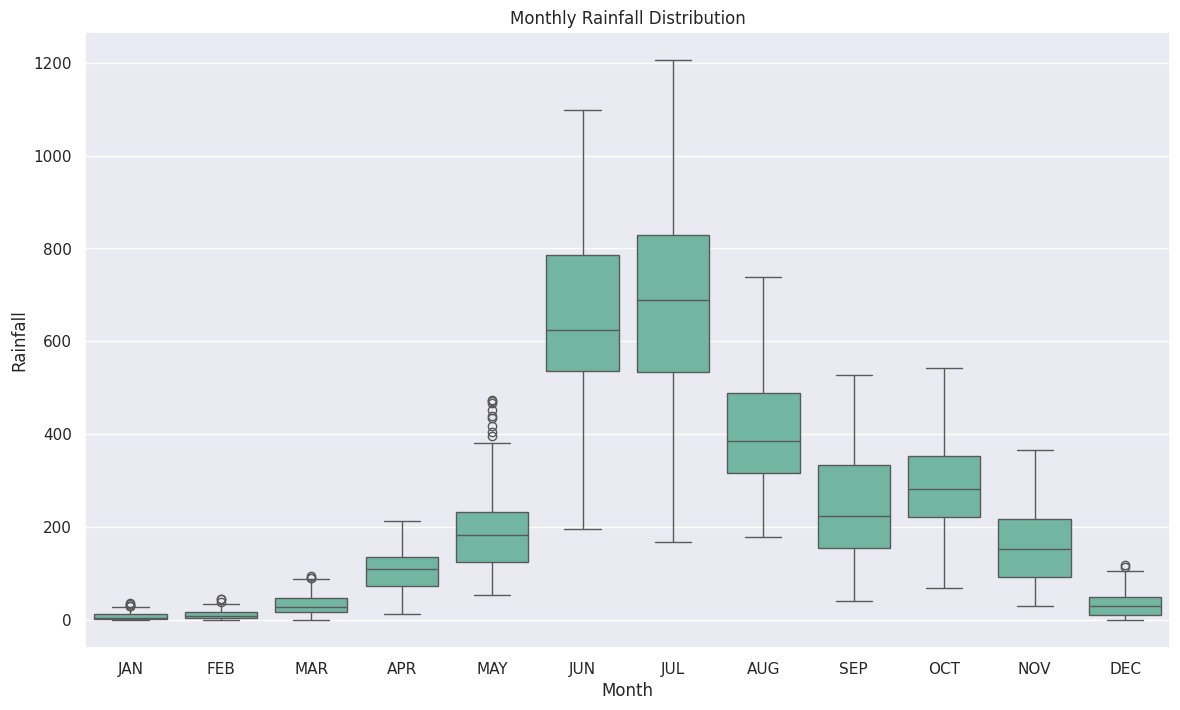

In [159]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]))
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.show()

**YEARWISE RAINFALL TREND:**

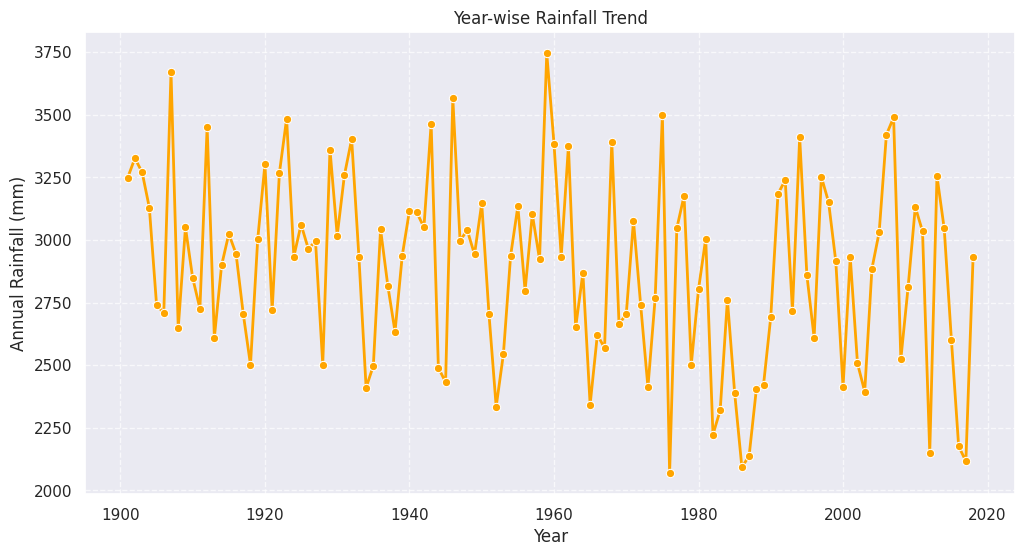

In [160]:

sns.set_theme(style="darkgrid", palette="Set2")
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y=' ANNUAL RAINFALL', data=data, color='orange', marker='o', linestyle='-', linewidth=2)
plt.title('Year-wise Rainfall Trend')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


**MONTHYLY RAINFALL AVGS OVER THE YEARS:** **bold text**

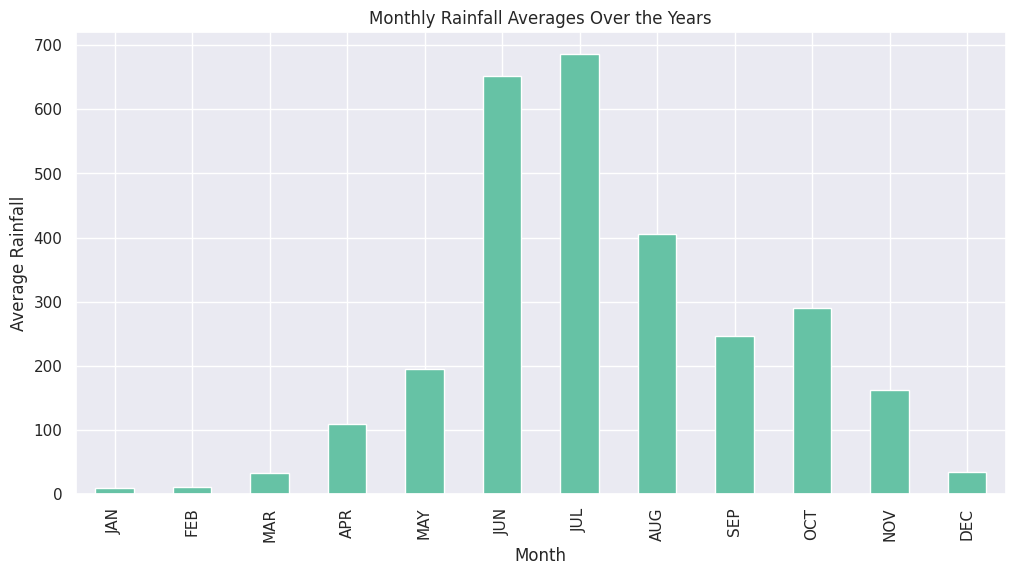

In [161]:
monthly_rainfall_averages = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()
plt.figure(figsize=(12, 6))
monthly_rainfall_averages.plot(kind='bar', title='Monthly Rainfall Averages Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.show()


**DISTRIBUTION OF FLOOD OCCURANCE:**

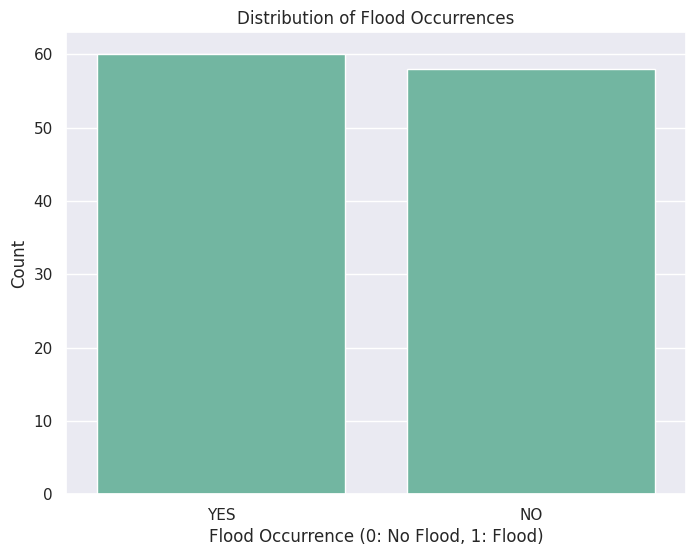

In [162]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FLOODS', data=data)
plt.title('Distribution of Flood Occurrences')
plt.xlabel('Flood Occurrence (0: No Flood, 1: Flood)')
plt.ylabel('Count')
plt.show()

**CORRELATION B/W RAINFALL AND FLOODS:**

In [163]:
rainfall_vs_floods = data[[' ANNUAL RAINFALL', 'FLOODS']]

In [166]:
print(rainfall_vs_floods['FLOODS'].unique())

['YES' 'NO']


<ipython-input-167-966d2a350d92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_vs_floods['FLOODS'] = rainfall_vs_floods['FLOODS'].replace({'YES': 1, 'NO': 0})


<Figure size 1000x800 with 0 Axes>

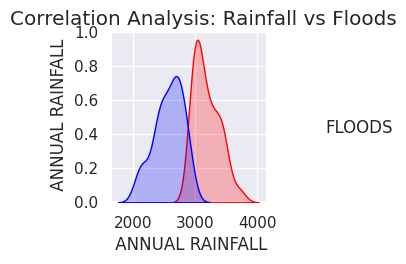

In [167]:
# Change 'YES' and 'NO' to numerical values (e.g., 1 and 0)
rainfall_vs_floods['FLOODS'] = rainfall_vs_floods['FLOODS'].replace({'YES': 1, 'NO': 0})

# Plot the pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(rainfall_vs_floods, hue='FLOODS', markers=['o', 's'], palette={0: 'blue', 1: 'red'})
plt.suptitle('Correlation Analysis: Rainfall vs Floods', y=1.02)
plt.show()

**CORRELATION MATRIX:**

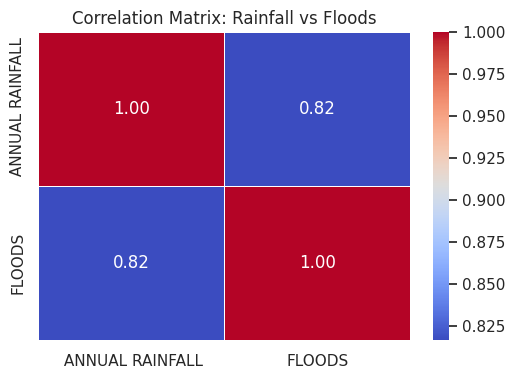

In [168]:
correlation_matrix_rf = rainfall_vs_floods.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_rf, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Rainfall vs Floods')
plt.show()

In [169]:
data['FLOODS'] = data['FLOODS'].map({'YES': 1, 'NO': 0})

##**MODEL** **DEVELOPMENT**

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**SPLITTING DATA:**

In [171]:
X_trainX, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**MODEL SELECTION AND TRAINING**

In [172]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [173]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

feature_importance = model.feature_importances_
print(f'Feature Importance: {feature_importance}')

Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        10
         YES       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Feature Importance: [0.04222403 0.01758374 0.01756239 0.02034474 0.03742801 0.11884591
 0.09422839 0.04023283 0.0856868  0.01610222 0.04019609 0.01671616
 0.45284868]


**LOGISTIC REGRESSION MODEL**

In [174]:
"""logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))"""

Logistic Regression:
Accuracy: 0.5416666666666666
Confusion Matrix:
 [[5 5]
 [6 8]]
Classification Report:
               precision    recall  f1-score   support

          NO       0.45      0.50      0.48        10
         YES       0.62      0.57      0.59        14

    accuracy                           0.54        24
   macro avg       0.53      0.54      0.53        24
weighted avg       0.55      0.54      0.54        24



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**DECISION TREE MODEL**

In [175]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, decision_tree_predictions))
print("Classification Report:\n", classification_report(y_test, decision_tree_predictions))

feature_importance = model.feature_importances_
print(f'Feature Importance: {feature_importance}')


Decision Tree:
Accuracy: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 14]]
Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00        10
         YES       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Feature Importance: [0.04222403 0.01758374 0.01756239 0.02034474 0.03742801 0.11884591
 0.09422839 0.04023283 0.0856868  0.01610222 0.04019609 0.01671616
 0.45284868]


### **comparing all prediction models**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


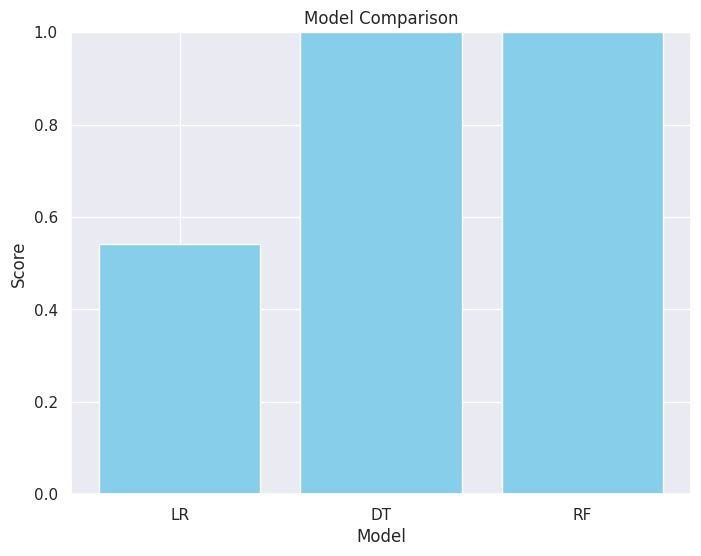

In [234]:

models = [
          ('LR', LogisticRegression()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier())]
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = accuracy_score(y_test, y_pred)
    scores.append(model_score)
    names.append(name)
model_scores = pd.DataFrame({'Name': names, 'Score': scores})

plt.figure(figsize=(8, 6))
plt.bar(model_scores['Name'], model_scores['Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()

####**the model predictions and conditional probabilities for different rainfall categories**

######CALCULATE AND ANALYSE CONDITIONAL PROBABILITIES

In [227]:

combined_data = pd.DataFrame({'Model_Predictions': model_predictions, 'Rainfall_Category': rainfall_categories})
conditional_probabilities = combined_data.groupby(['Rainfall_Category', 'Model_Predictions']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
print(conditional_probabilities)


Model_Predictions   NO  YES
Rainfall_Category          
High               1.0  0.0
Low                0.0  1.0
Medium             1.0  0.0




---



### Strengths and Weaknesses:

##### Decision Tree:
- **Strengths:**
- Achieved perfect accuracy( 0.1 )on the test set.

- **Weaknesses:**
- Prone to overfitting, especially on small datasets.

##### Random Forest:
- **Strengths:**
- Maintained perfect accuracy(0.1) on the test set.
- Handles overfitting through ensemble learning.

- **Weaknesses:**
- Complexity and resource-intensive compared to a single Decision Tree.

##### Logistic Regression:
- **Strengths:**
- Simplicity and interpretability.
- Fast training and prediction.

- **Weaknesses:**
- Limited ability to capture complex relationships in the data.

####**the model predictions and conditional probabilities for different rainfall categories.**
.High Rainfall: Predicted flooding won't occur.

.Low Rainfall: Predicted flooding will occur.

.Medium Rainfall: Predicted flooding won't occur.
#### . Importance of Rainfall Variables:

- **Random Forest Feature Importance:**
- Variables with the highest importance (e.g.,  ANNUAL RAINFALL) play a crucial role in predicting floods.
- Understanding these variables can contribute to flood prediction and management.

### Conclusion:

- Both Decision Tree and Random Forest models performed exceptionally well.
- Logistic Regression showed lower accuracy, indicating its limitations on this dataset.
- The importance of rainfall variables suggests their significant impact on flood prediction.
  
  .Area for Future Research or Improvements:
    (fine tuning models,temporal analysisetc)